In [ ]:
! pip install pandas

In [2]:
# importar as bibliotecas necessárias
import matplotlib.pyplot as plt
import pandas as pd
import sqlite3

# Extração das informações

In [3]:
with sqlite3.connect("spotify.db") as conn:
    df = pd.read_sql("SELECT * FROM visao_geral;", conn)

df.head()

,track_id,track_name,release_date,artist_name,artist_followers,track_popularity,valence
0,6mN8nzCXWUeT5LWEcG1Utx,Amazing Grace,2015-06-09 00:00:00 UTC,Radiancematrix,959,2.0,0.0314
1,58sgjtx3FOnBBEOd3BQE6C,Silent Night,2015-06-09 00:00:00 UTC,Radiancematrix,959,2.0,0.0261
2,45tQJhm0WSk5VWMZK3FsLK,Ancient Canyons,2015-06-09 00:00:00 UTC,Radiancematrix,959,4.0,0.0299
3,3VFD7QqkJSg0OR6yBwKl7A,Pacha Mama Medicina,2015-06-09 00:00:00 UTC,Radiancematrix,959,1.0,0.0292
4,7LwJV5BEIC9BQnzvaBSyCc,Palace Of Light,2015-06-09 00:00:00 UTC,Radiancematrix,959,3.0,0.0270


# Descrição dos dados

In [4]:
# exibir os formatos de dados por coluna
print(f"formato de dados do dataframe: \n {df.dtypes}")

formato de dados do dataframe: 
 track_id             object
track_name           object
release_date         object
artist_name          object
artist_followers      int64
track_popularity    float64
valence             float64
dtype: object


In [5]:
# identificação de valores nulos
print(f"valores nulos: \n {df.isnull().sum()}")

valores nulos: 
 track_id             0
track_name           5
release_date        23
artist_name          0
artist_followers     0
track_popularity    10
valence              0
dtype: int64


In [6]:
# número de valores únicos por coluna
print(f"valores únicos: \n {df.nunique()}")

valores únicos: 
 track_id            438112
track_name          300671
release_date          7731
artist_name          36187
artist_followers     12116
track_popularity       100
valence               2066
dtype: int64


In [7]:
# estatísticas dos dados
print(f"estatísticas: \n {df.describe()}")

estatísticas: 
        artist_followers  track_popularity        valence
count      4.381370e+05     438127.000000  438137.000000
mean       2.484010e+06         10.365846       0.457244
std        9.764826e+06         15.697043       0.266999
min        0.000000e+00          0.000000       0.000000
25%        3.320000e+02          0.000000       0.233000
50%        6.450000e+03          2.000000       0.445000
75%        5.603530e+05         15.000000       0.669000
max        1.159989e+08         99.000000       1.000000


# Tratamento dos dados

### Tratamento de valores nulos
Colunas release_date, track_name e track_popularity

In [8]:
# criar uma coluna para o ano de lançamento
df["ano"] = pd.to_datetime(df["release_date"], errors="coerce").dt.year

In [9]:
# remover linhas sem uma data de lançamento válida
df.dropna(subset=["ano"], inplace=True)

# corrigir o formato da coluna ano
df["ano"] = df["ano"].astype(int)

In [10]:
# criar a coluna década
df["decada"] = (df["ano"] // 10) * 10

In [11]:
# remover as linhas sem nome da faixa
df.dropna(subset=["track_name"], inplace=True)

In [12]:
# substituir por 0 os valores nulos de popularidade da faixa
df.fillna({"track_popularity":0}, inplace=True)

### Remover duplicatas
Coluna track_id

In [13]:
# identificar valores duplicados
df[df.duplicated(subset=["track_id"], keep=False)] \
  .sort_values("track_id") \
  [["track_id", "track_name", "ano", "valence"]]


,track_id,track_name,ano,valence
429204,0R7YVi7w41Dr9jU5vblAok,Sweat - Remix,2011,0.731
417673,0R7YVi7w41Dr9jU5vblAok,Sweat - Remix,2011,0.731
33420,0gIhlWV243Z1K93QfCeJTM,To Know Him Is To Love Him - 2015 Remaster,1987,0.354
401232,0gIhlWV243Z1K93QfCeJTM,To Know Him Is To Love Him - 2015 Remaster,2005,0.354
425785,0jvN7eQJJt4nxQzgQfZ1SP,Spirit In The Sky - Deluxe Edition,1969,0.543
379015,0jvN7eQJJt4nxQzgQfZ1SP,Spirit In The Sky - Deluxe Edition,1996,0.543
426763,0y24jS32Msz0vmm8i9i8ZH,Coming Home,2006,0.434
397589,0y24jS32Msz0vmm8i9i8ZH,Coming Home,2020,0.434
430821,1iKMpywaaihrz8gqaRqzp1,Just As I Am (Feat. Prince Royce & Chris Brown),2017,0.708
373442,1iKMpywaaihrz8gqaRqzp1,Just As I Am (Feat. Prince Royce & Chris Brown),2017,0.708


In [14]:
# limpar linhas com valores duplicados
df.drop_duplicates(subset="track_id", keep="first", inplace=True)

# Análise exploratória

## Distribuição da valência (visão geral)

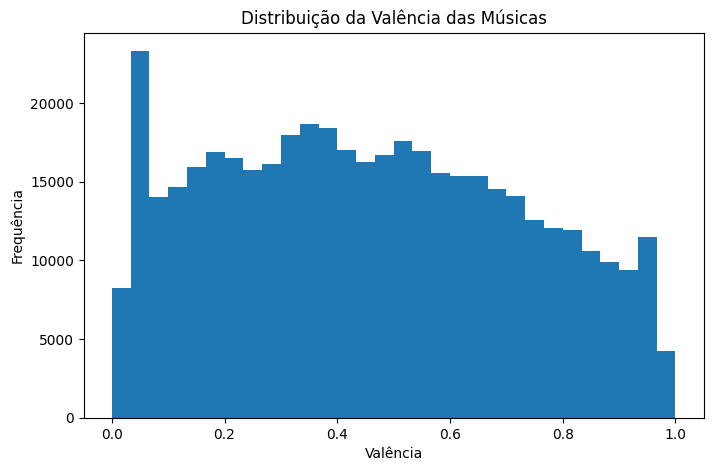

In [15]:
# histograma de distribuição da valência
plt.figure(figsize=(8, 5))
plt.hist(df["valence"], bins=30)
plt.title("Distribuição da Valência das Músicas")
plt.xlabel("Valência")
plt.ylabel("Frequência")
plt.show()

A distribuição apresenta ampla dispersão ao longo da escala de valência, sem concentração extrema em valores positivos ou negativos. Observa-se um pico em valores muito baixos de valência, sugerindo a presença de um subconjunto específico de faixas com caráter emocional extremamente negativo ou neutro.

Essa distribuição sugere que, de forma agregada, as músicas disponíveis no Spotify não são predominantemente associadas a emoções altamente positivas, o que levanta a questão de como essa característica se comporta ao longo do tempo.

## Evolução temporal da valência média

In [16]:
# valência média anual
valence_por_ano = (
    df.groupby("ano")["valence"]
      .mean()
      .reset_index()
)

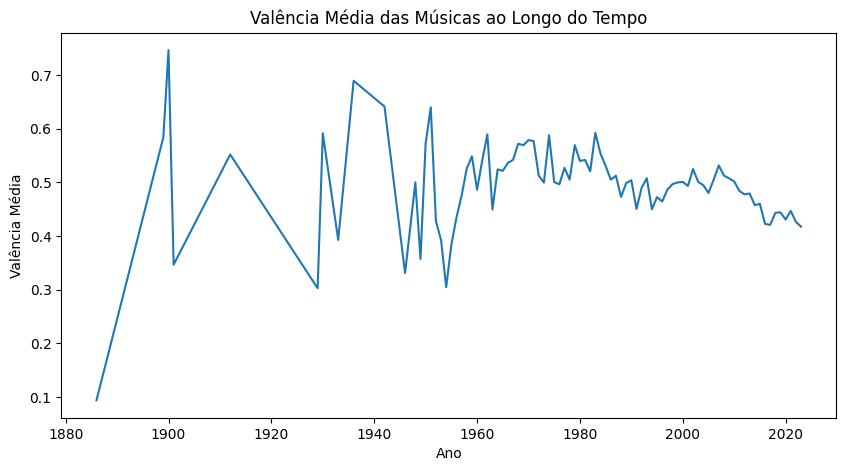

In [17]:
plt.figure(figsize=(10, 5))
plt.plot(valence_por_ano["ano"], valence_por_ano["valence"])
plt.title("Valência Média das Músicas ao Longo do Tempo")
plt.xlabel("Ano")
plt.ylabel("Valência Média")
plt.show()

A análise da valência média ao longo do tempo revela que as músicas raramente atingem níveis elevados de positividade, mantendo-se majoritariamente em valores moderados. Após um período inicial de maior volatilidade, possivelmente associado à menor quantidade de registros, observa-se uma relativa estabilidade emocional entre as décadas de 1960 e 1990. A partir dos anos 2000, contudo, há uma tendência consistente de queda na valência média, sugerindo que as músicas contemporâneas apresentam, em média, menor carga emocional positiva em comparação com períodos anteriores.

## Evolução da média x mediana da valência ao longo do tempo

In [18]:
# média e mediana da valência por ano
valence_stats = (
    df.groupby("ano")["valence"]
      .agg(["mean", "median"])
      .reset_index()
)

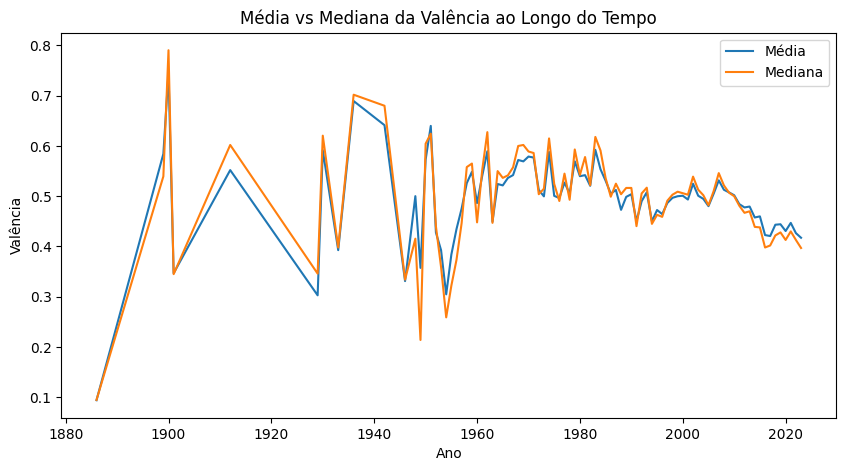

In [19]:
plt.figure(figsize=(10, 5))
plt.plot(valence_stats["ano"], valence_stats["mean"], label="Média")
plt.plot(valence_stats["ano"], valence_stats["median"], label="Mediana")
plt.title("Média vs Mediana da Valência ao Longo do Tempo")
plt.xlabel("Ano")
plt.ylabel("Valência")
plt.legend()
plt.show()

A comparação entre média e mediana da valência ao longo do tempo mostra que ambas acompanham tendências semelhantes, indicando que as variações observadas não são resultado de valores extremos isolados. A partir dos anos 2000, nota-se uma queda conjunta dessas métricas, sugerindo um deslocamento do centro da distribuição emocional das músicas para valores menos positivos, e não apenas a presença de faixas atípicas.

## Identificação de outliers

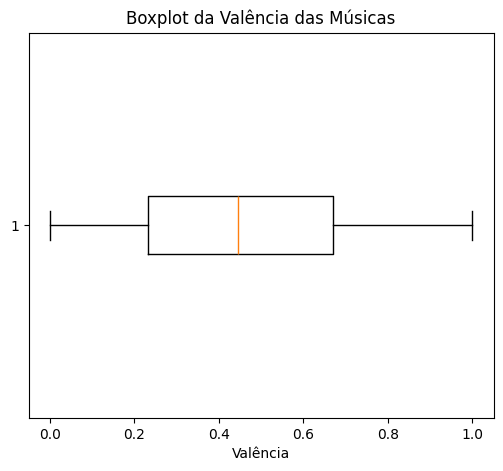

In [20]:
plt.figure(figsize=(6, 5))
plt.boxplot(df["valence"], vert=False)
plt.title("Boxplot da Valência das Músicas")
plt.xlabel("Valência")
plt.show()

Embora o histograma possa sugerir menor presença de músicas altamente positivas, o boxplot indica que a média e a mediana próximas refletem uma distribuição relativamente simétrica, centrada em valores moderados de valência. Isso sugere que não são poucas músicas extremamente tristes que puxam a média para baixo, mas sim uma predominância de músicas com valência intermediária.

## Relação entre valência e popularidade

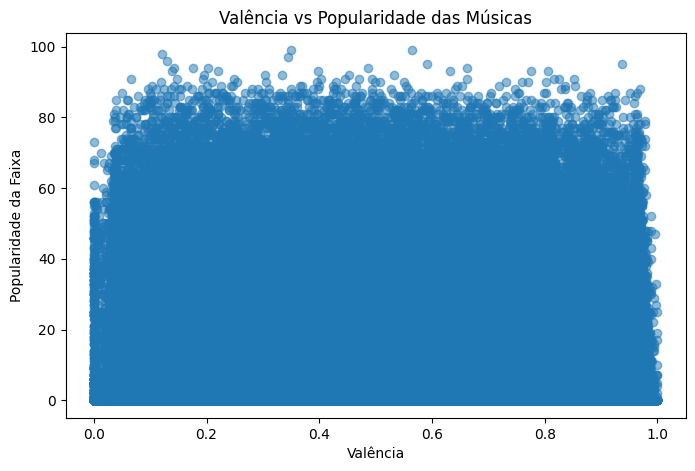

In [21]:
plt.figure(figsize=(8, 5))
plt.scatter(df["valence"], df["track_popularity"], alpha=0.5)
plt.title("Valência vs Popularidade das Músicas")
plt.xlabel("Valência")
plt.ylabel("Popularidade da Faixa")
plt.show()

In [22]:
correlacao = df[["track_popularity", "valence"]].corr()

print(correlacao)

                  track_popularity   valence
track_popularity          1.000000  0.031529
valence                   0.031529  1.000000


A análise do gráfico de dispersão entre valência e popularidade não indica uma relação linear evidente entre as variáveis. Esse padrão é corroborado pelo coeficiente de correlação de Pearson, que apresentou valor de 0,0315, indicando uma correlação extremamente fraca e praticamente inexistente. Esse resultado sugere que a popularidade de uma faixa não está associada de forma significativa ao seu valor emocional, reforçando a hipótese de que outros fatores — como artista, contexto cultural, mecanismos algorítmicos da plataforma e estratégias de marketing — exercem maior influência sobre o sucesso das músicas.